# Example of how to use eigensimpy signal class

First we need to import Eigensimpy package

In [7]:
# add eigensym py to the
import sys
import os

current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)  # This moves up one level to the project folder

sys.path.append(project_dir)


Then we can use the pulse factory to create a signal

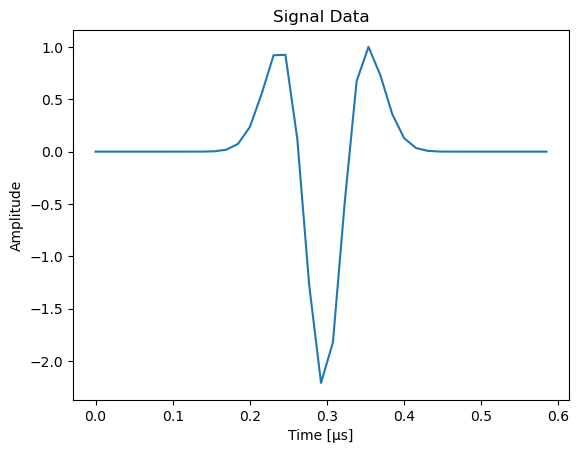

In [8]:
from eigensimpy.dsp.SignalFactories import PulseFactory
pf = PulseFactory();
signal = pf.calc_pulse('simple1') 

ax = signal.plot()

# Test
